### Ejercicio 4: Superestructura de un proceso químico (MILP)

Una empresa desea producir el compuesto C, el cual puede ser obtenido mediante los procesos II o III. Ambos usan como materia prima el compuesto B. Este compuesto B puede ser comprado a otra empresa (Bext) o puede ser obtenido mediante el proceso I a partir del compuesto A. Dadas las siguientes especificaciones, formula el problema de optimización como MILP y resuélvelo utilizando PYOMO para decidir:

1. ¿Qué proceso construir (II y III son excluyentes)?
2. ¿Cuánto se debe producir de B?
3. ¿Cuánto se debe producir del producto C?

[//]: #

El objetivo es maximizar el beneficio. Máxima demanda de C de 10 tons/h con un precio de venta de 1800 eur/ton

Datos:

|             | Costes fijos <br/>(eur/hr) | Costes variables <br/> (eur/ton mat prima) |
|:-----------:|:--------------:|:-------------------------:|
|  Proceso I  |      1000      |            250            |
|  Proceso II |      1500      |            400            |
| Proceso III |      2000      |            550            |



|             | Conversión | 
|:-----------:|:--------------:|
|  Proceso I  |      90% de A a B      |           
|  Proceso II |      82% de B a C      |           
| Proceso III |      95% de B a C      |          

Precios: A: 500 eur/ton;  B: 950 eur/ton <br>
Máxima cantidad disponible de A: 16 tons/hr <br>

[//]: # "NOTE:You may want to scale your cost coefficients (e.g. divide them by 100)"

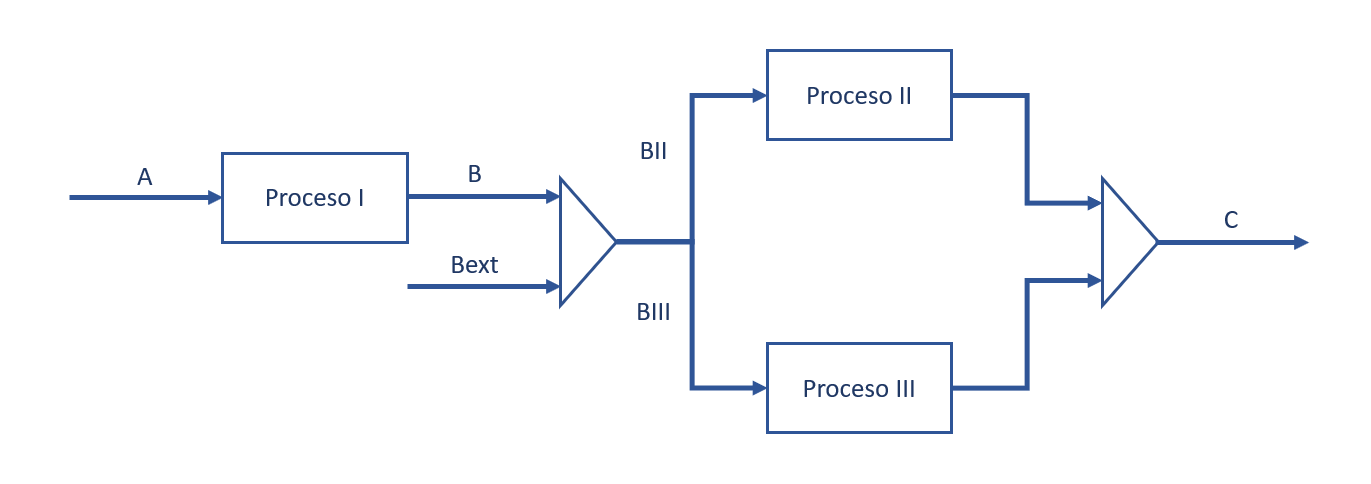

#### Formulamos el problema


$$
\begin{align}
	&\text{max }  && 1800C-500A-950Bext-(250A+1000y_I)-(400BII+1500y_{II})-(550BIII+2000y_{III})&&\\
	&\text{s.t. }  && \\
	&\text{MB1 }  && CII+CIII = C\\
    &\text{MB2 }  && CII =0.82BII \\
    &\text{MB3 } && CIII =0.95BIII \\
    &\text{MB4 } && B+Bext =BII+BIII \\
    &\text{MB5 } && B =0.9A\\
    &\text{Clim} && C \le 10\\
    &\text{Alim} && A \le 16\\
    &\text{Disy} && y_{II}+y_{III} =1\\    
    &\text{Cont1} && A \le 50y_I\\
    &\text{Cont2} && BII \le 50y_{II}\\
    &\text{Cont3} && BIII \le 50y_{III}\\
    & && A, Bext, B, BII, BIII, C, CII, CIII \geq  0  \\
    & && y_I, y_{II}, y_{III} \in \{0,1\}  \\
\end{align}
$$

#### Importamos PYOMO y definimos el modelo

In [1]:
from pyomo.environ import *
model = ConcreteModel()

#### Definimos variables

In [2]:
model.yI   = Var(within=Binary)
model.yII  = Var(within=Binary)
model.yIII = Var(within=Binary)

model.A    = Var(domain=NonNegativeReals)

model.Bext = Var(domain=NonNegativeReals)
model.B    = Var(domain=NonNegativeReals)
model.BII  = Var(domain=NonNegativeReals)
model.BIII = Var(domain=NonNegativeReals)

model.C    = Var(domain=NonNegativeReals)
model.CII  = Var(domain=NonNegativeReals)
model.CIII = Var(domain=NonNegativeReals)

#### Restricciones

In [3]:
model.MB1=Constraint(expr=(model.CII+model.CIII == model.C))
model.MB2=Constraint(expr=(model.CII ==model.BII*0.82))
model.MB3=Constraint(expr=(model.CIII ==model.BIII*0.95))
model.MB4=Constraint(expr=(model.B+model.Bext == model.BII+model.BIII))
model.MB5=Constraint(expr=(model.B == model.A*0.9))

model.limit_C=Constraint(expr=(model.C<=10))
model.limit_A=Constraint(expr=(model.A<=16))      

model.disj=Constraint(expr=(model.yII+model.yIII==1))
model.contI=Constraint(expr=(model.A<=model.yI*50))
model.contII=Constraint(expr=(model.BII<=model.yII*50))
model.contIII=Constraint(expr=(model.BIII<=model.yIII*50))

####  Objetivo

In [4]:
model.Obj = Objective(expr=(1800*model.C-500*model.A-950*model.Bext-(250*model.A+1000*model.yI)-(400*model.BII+1500*model.yII) \
                            -(550*model.BIII+2000*model.yIII)) , sense=maximize)

#### Resolución del problema

In [5]:
results = SolverFactory('glpk').solve(model)
model.pprint()
results.write()


11 Var Declarations
    A : Size=1, Index=None
        Key  : Lower : Value           : Upper : Fixed : Stale : Domain
        None :     0 : 13.550135501355 :  None : False : False : NonNegativeReals
    B : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 12.1951219512195 :  None : False : False : NonNegativeReals
    BII : Size=1, Index=None
        Key  : Lower : Value            : Upper : Fixed : Stale : Domain
        None :     0 : 12.1951219512195 :  None : False : False : NonNegativeReals
    BIII : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False : False : NonNegativeReals
    Bext : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :   0.0 :  None : False : False : NonNegativeReals
    C : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :